# Data Preparation
---

In [1]:
import pandas as pd

# Plots
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, StandardScaler
from sklearn.model_selection import GridSearchCV, RepeatedStratifiedKFold, train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

# Models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

### Upload dataset

In [2]:
# Read csv file
df = pd.read_csv("./data/diabetes_data_upload.csv")

# Convert column names
df.columns = [columns.lower().replace(" ", "_") for columns in df.columns]

### Explore the dataset

In [3]:
df.head(5)

,age,gender,polyuria,polydipsia,sudden_weight_loss,weakness,polyphagia,genital_thrush,visual_blurring,itching,irritability,delayed_healing,partial_paresis,muscle_stiffness,alopecia,obesity,class
0,40,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,58,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
2,41,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive
3,45,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive
4,60,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520 entries, 0 to 519
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   age                 520 non-null    int64 
 1   gender              520 non-null    object
 2   polyuria            520 non-null    object
 3   polydipsia          520 non-null    object
 4   sudden_weight_loss  520 non-null    object
 5   weakness            520 non-null    object
 6   polyphagia          520 non-null    object
 7   genital_thrush      520 non-null    object
 8   visual_blurring     520 non-null    object
 9   itching             520 non-null    object
 10  irritability        520 non-null    object
 11  delayed_healing     520 non-null    object
 12  partial_paresis     520 non-null    object
 13  muscle_stiffness    520 non-null    object
 14  alopecia            520 non-null    object
 15  obesity             520 non-null    object
 16  class               520 no

There are 16 features wherein 15 are categorical features and 1 is numerical feature

In [5]:
df.describe(include=["number"]).T

,count,mean,std,min,25%,50%,75%,max
age,520.0,48.028846,12.151466,16.0,39.0,47.5,57.0,90.0


In [6]:
df.describe(include=[object])

,gender,polyuria,polydipsia,sudden_weight_loss,weakness,polyphagia,genital_thrush,visual_blurring,itching,irritability,delayed_healing,partial_paresis,muscle_stiffness,alopecia,obesity,class
count,520,520,520,520,520,520,520,520,520,520,520,520,520,520,520,520
unique,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
top,Male,No,No,No,Yes,No,No,No,No,No,No,No,No,No,No,Positive
freq,328,262,287,303,305,283,404,287,267,394,281,296,325,341,432,320


Check if we have missing values

In [7]:
df.isnull().sum()

age                   0
gender                0
polyuria              0
polydipsia            0
sudden_weight_loss    0
weakness              0
polyphagia            0
genital_thrush        0
visual_blurring       0
itching               0
irritability          0
delayed_healing       0
partial_paresis       0
muscle_stiffness      0
alopecia              0
obesity               0
class                 0
dtype: int64

Standard deviation for numerial features

In [8]:
df.std()

/var/folders/sh/m6076szn74ld22bb1bwzmchw0000gn/T/ipykernel_23138/3390915376.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.std()


age    12.151466
dtype: float64

Check if we have duplicates

In [9]:
df.duplicated().any()

True

### Create Pipeline

In [10]:
# Split df into X and y
# X is the features
# y is the label
X = df.drop("class", axis=1)
y = df["class"]
    
# Split the dataset into training and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [11]:
# Check if we have 4:1
X_train.shape, X_test.shape

((416, 16), (104, 16))

Correlation matrix

In [12]:
categorical_features = list(X_train.select_dtypes(exclude=["number"]).columns)
numeric_features = list(X_train.select_dtypes(exclude=[object]).columns)

# Preprocessor
preprocessor = ColumnTransformer(transformers=[
    ('numericals', MinMaxScaler(), numeric_features),
    ('categoricals', OneHotEncoder(drop="if_binary"), categorical_features),
])

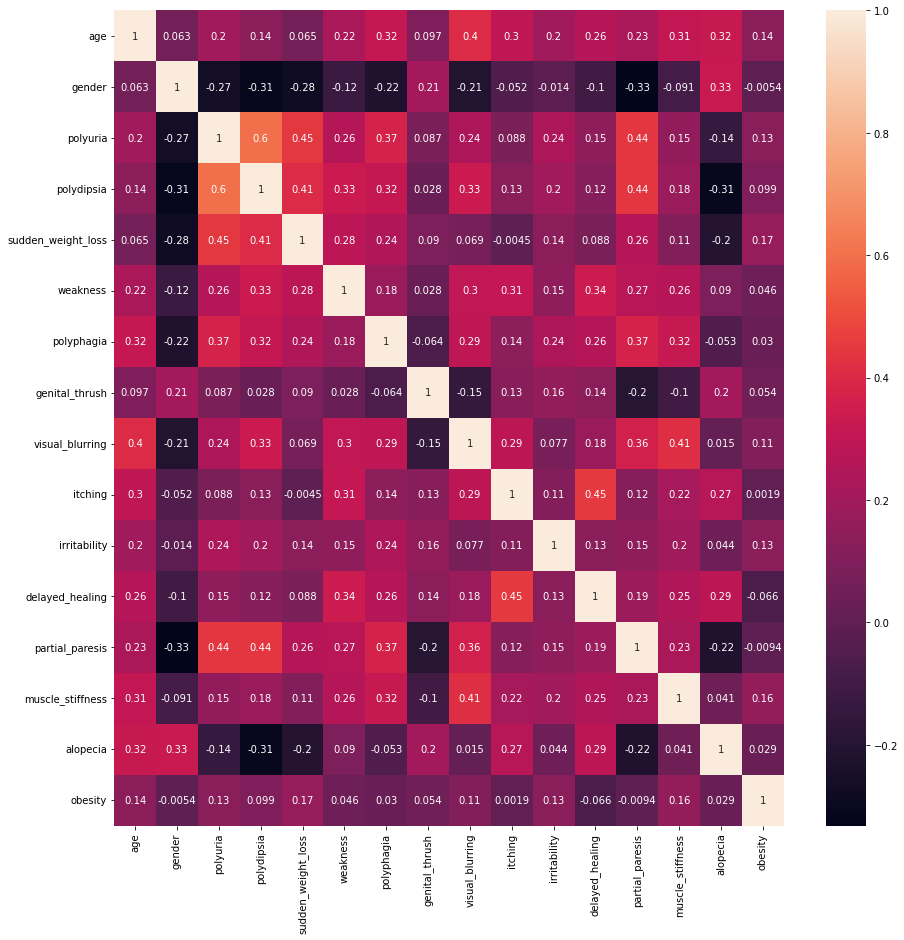

In [13]:
X_processed = pd.DataFrame(preprocessor.fit_transform(X), columns=X.columns)
X_processed_corr = X_processed.corr()

fig = plt.figure(figsize=(15, 15))
sns.heatmap(X_processed_corr, annot=True)
fig.savefig('./images/correlation_matrix.pdf')

### Tune the hyperparameters

In [14]:
def plot_confusion_matrix(y_true, y_pred, labels):
    """Plot the confusion matrix."""
    
    #Generate the confusion matrix
    cf_matrix = confusion_matrix(y_test, y_pred_rf)
    
    ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')

    ax.set_title('Confusion Matrix');
    ax.set_xlabel('Predicted Values')
    ax.set_ylabel('Actual Values');

    ## Ticket labels - List must be in alphabetical order
    ax.xaxis.set_ticklabels(['Negative','Positive'])
    ax.yaxis.set_ticklabels(['Negative','Positive'])

    ## Display the visualization of the Confusion Matrix.
    plt.show()

**For the `Logistic Regression`**

In [15]:
# Pipeline
pipeline = Pipeline(steps=[
    ('preprocessing', preprocessor),
    ('clf', LogisticRegression())
])

# Define the parameters space
params = {
    'clf__solver': ['liblinear'],
    'clf__penalty': ['l1', 'l2'],
    'clf__C': [0.01, 0.1, 1, 10, 100],
    'clf__random_state': [42]
}

rskf = RepeatedStratifiedKFold(n_splits = 5, n_repeats = 2, random_state = 42)

cv = GridSearchCV(
    estimator=pipeline, 
    param_grid=params, 
    cv=rskf,
    n_jobs=-1
)

cv.fit(X_train, y_train)

print(f'Best F1-score: {cv.best_score_:.3f}\n')
print(f'Best parameter set: {cv.best_params_}\n')
print(f'Scores: {classification_report(y_test, cv.predict(X_test))}')

Best F1-score: 0.924

Best parameter set: {'clf__C': 10, 'clf__penalty': 'l1', 'clf__random_state': 42, 'clf__solver': 'liblinear'}

Scores:               precision    recall  f1-score   support

    Negative       0.90      0.85      0.88        33
    Positive       0.93      0.96      0.94        71

    accuracy                           0.92       104
   macro avg       0.92      0.90      0.91       104
weighted avg       0.92      0.92      0.92       104



**For the `RandomForestClassifier`**

In [16]:
# Pipeline
pipeline = Pipeline(steps=[
    ('preprocessing', preprocessor),
    ('clf', RandomForestClassifier())
])

# Define the parameters space
params = {
    'clf__n_estimators': [50, 100, 200],
    'clf__max_depth': [5, 10, 20],
    'clf__max_leaf_nodes': [None, 5, 10],
    'clf__random_state': [42]
    
}

rskf = RepeatedStratifiedKFold(n_splits=5, n_repeats=2, random_state=42)

cv = GridSearchCV(
    estimator=pipeline, 
    param_grid=params,
    cv=rskf,
    n_jobs=-1
)

cv.fit(X_train, y_train)

print(f'Best F1-score: {cv.best_score_:.3f}\n')
print(f'Best parameter set: {cv.best_params_}\n')
print(f'Scores: {classification_report(y_test, cv.predict(X_test))}')

Best F1-score: 0.968

Best parameter set: {'clf__max_depth': 10, 'clf__max_leaf_nodes': None, 'clf__n_estimators': 100, 'clf__random_state': 42}

Scores:               precision    recall  f1-score   support

    Negative       0.97      1.00      0.99        33
    Positive       1.00      0.99      0.99        71

    accuracy                           0.99       104
   macro avg       0.99      0.99      0.99       104
weighted avg       0.99      0.99      0.99       104



**For the `SVC`**

In [18]:
# Pipeline
pipeline = Pipeline(steps=[
    ('preprocessing', preprocessor),
    ('clf', DecisionTreeClassifier())
])

# Define the parameters space
params = {
    'clf__max_depth': [5, 10],
    'clf__max_leaf_nodes': [5,10,15,20],
    'clf__random_state': [42]
}

# to do: rethink
rskf = RepeatedStratifiedKFold(n_splits = 5, n_repeats = 2, random_state = 42)

cv = GridSearchCV(
    estimator=pipeline, 
    param_grid=params, 
    cv=rskf,
    n_jobs=-1
)

cv.fit(X_train, y_train)

print(f'Best F1-score: {cv.best_score_:.3f}\n')
print(f'Best parameter set: {cv.best_params_}\n')
print(f'Scores: {classification_report(y_test, cv.predict(X_test))}')

Best F1-score: 0.952

Best parameter set: {'clf__max_depth': 5, 'clf__max_leaf_nodes': 20, 'clf__random_state': 42}

Scores:               precision    recall  f1-score   support

    Negative       0.89      1.00      0.94        33
    Positive       1.00      0.94      0.97        71

    accuracy                           0.96       104
   macro avg       0.95      0.97      0.96       104
weighted avg       0.97      0.96      0.96       104



In [ ]:
# pre-processing done, pipeline done
# TO DO: justify models, why this hyperparameters, check outliers first and duplicate values!